In [20]:
# Import Libraries and Connect to Database
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
conn = sqlite3.connect('movies.sqlite')

In [22]:
# Query to retrieve budget data
query = "SELECT budget FROM movies WHERE budget IS NOT NULL;"
budget_data = pd.read_sql(query, conn)

In [25]:
# List all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
cur.execute(query)
tables = cur.fetchall()

# Print available table names
print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
movies
sqlite_sequence
directors


In [50]:
# Distribution of Movie Budgets (Matplotlib)
# ===============================
# SQL Query to fetch budget data
query = "SELECT budget FROM movies WHERE budget IS NOT NULL;"
budget_data = pd.read_sql_query(query, conn)

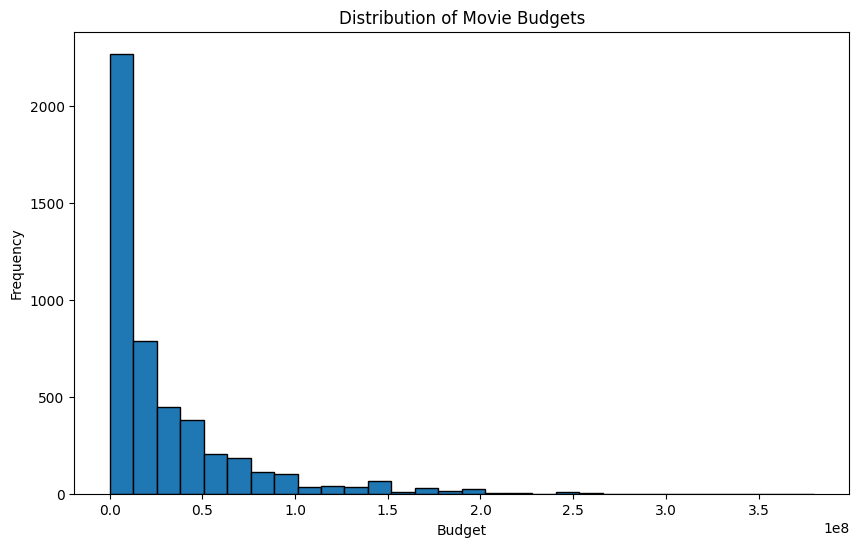

In [27]:
# Visualization
plt.figure(figsize=(10, 6))
plt.hist(budget_data['budget'], bins=30, edgecolor='k')
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.show()

The majority of movie budgets are concentrated in the lower range, indicating that most movies are produced on a relatively smaller budget.

In [51]:
# Top 10 Movie Budgets (Seaborn)
# ===============================
# SQL Query to fetch top 10 movies by budget
query = """
SELECT title, budget
FROM movies
WHERE budget IS NOT NULL
ORDER BY budget DESC
LIMIT 10;
"""
top_budget_data = pd.read_sql_query(query, conn)


<ipython-input-29-b280f7bf968b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='budget', y='title', data=top_budget_data, palette='viridis')


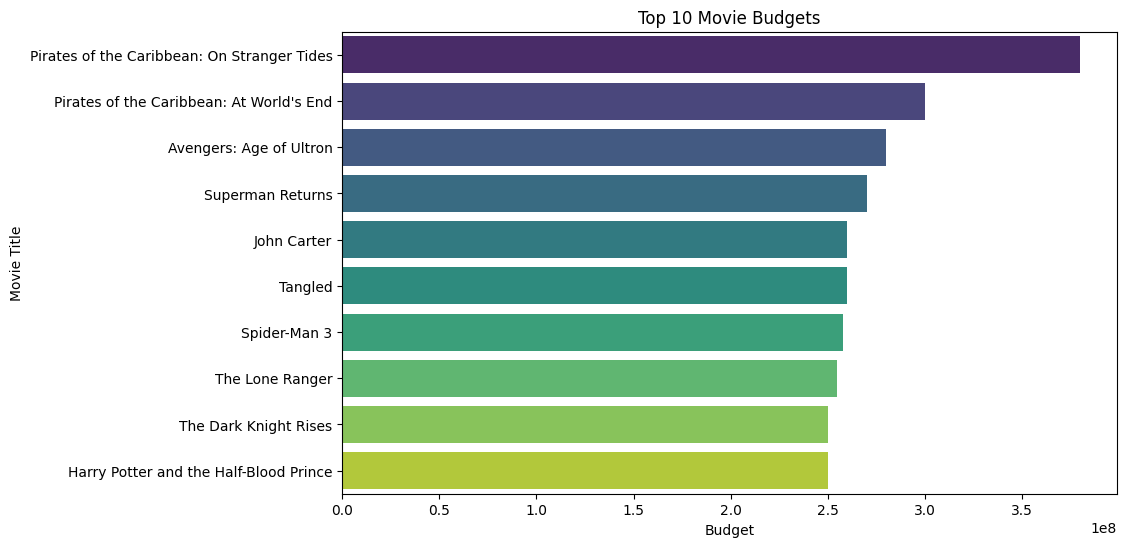

In [29]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='budget', y='title', data=top_budget_data, palette='viridis')
plt.title("Top 10 Movie Budgets")
plt.xlabel("Budget")
plt.ylabel("Movie Title")
plt.show()

The chart shows the top 10 movies with the highest budgets, with Pirates of the Caribbean: On Stranger Tides having the largest production budget, exceeding $350 million. Overall, big-budget movies tend to include sequels, superhero films, and popular franchises, reflecting significant investment in blockbuster productions.



In [52]:
#Extract year from release_date and count movies per year
query = """
SELECT strftime('%Y', release_date) AS year, COUNT(*) AS movie_count
FROM movies
WHERE release_date IS NOT NULL
GROUP BY year
ORDER BY year;
"""
movies_per_year = pd.read_sql_query(query, conn)

In [35]:
# Visualization: Number of Movies Released Per Year
fig = px.line(movies_per_year, x='year', y='movie_count',
              title="Number of Movies Released Per Year",
              labels={'year': 'Year', 'movie_count': 'Number of Movies'})
fig.show()

The number of movies released grew steadily until the 1970s, followed by rapid growth starting in the 1990s, peaking around 2010. The sharp decline after 2014 likely indicates incomplete data rather than an actual drop in production.


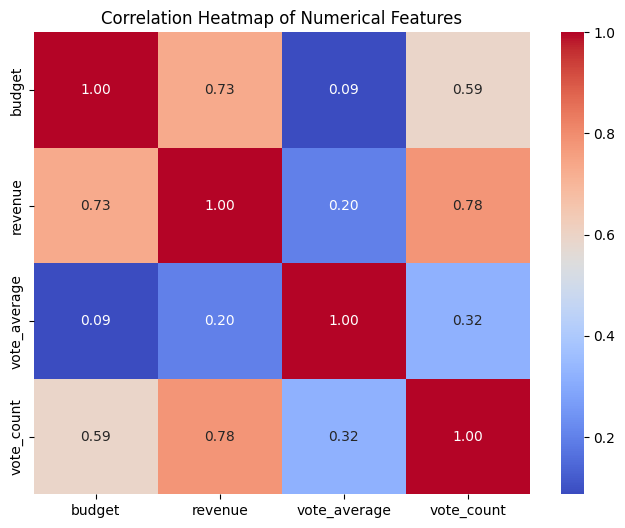

In [40]:
# SQL Query to fetch existing numerical columns
query = """
SELECT budget, revenue, vote_average, vote_count
FROM movies
WHERE budget IS NOT NULL AND revenue IS NOT NULL;
"""
correlation_data = pd.read_sql_query(query, conn)

# Generate Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


The heatmap shows the correlation between numerical features in the dataset:

Budget and Revenue (0.73): There is a strong positive correlation, indicating that higher budgets tend to result in higher revenues.

Revenue and Vote Count (0.78): A strong correlation exists between revenue and vote count, suggesting that popular movies (higher votes) generate higher revenue.

Budget and Vote Count (0.59): Moderate correlation, meaning higher-budget movies tend to attract more votes.

Vote Average and Other Features:

Weak correlation with budget (0.09) and revenue (0.20), indicating that high ratings do not necessarily correlate with higher budgets or revenues.
Moderate correlation with vote count (0.32), suggesting that movies with more votes tend to have higher average ratings.


In [53]:
# Top 10 Directors by Average Revenue (Seaborn)
# ===============================
# SQL Query to calculate average revenue by director
query = """
SELECT directors.name AS director_name, AVG(movies.revenue) AS avg_revenue
FROM directors
JOIN movies ON directors.id = movies.director_id
WHERE movies.revenue IS NOT NULL
GROUP BY directors.name
ORDER BY avg_revenue DESC
LIMIT 10;
"""
director_revenue = pd.read_sql_query(query, conn)


<ipython-input-42-520f7ff4d6f4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




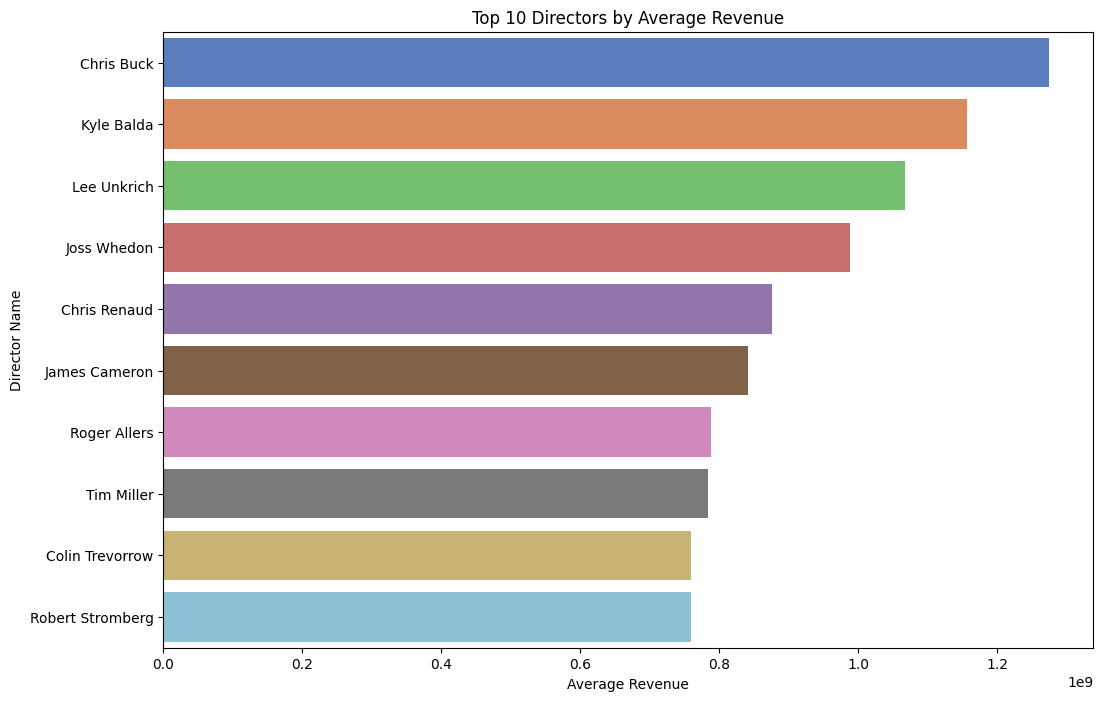

In [42]:
# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_revenue', y='director_name', data=director_revenue, palette='muted')
plt.title("Top 10 Directors by Average Revenue")
plt.xlabel("Average Revenue")
plt.ylabel("Director Name")
plt.show()

The chart displays the Top 10 Directors by Average Revenue, showcasing directors whose movies generate the highest average revenue:

Chris Buck leads with the highest average revenue, suggesting his movies are major blockbusters, likely animated hits (e.g., Frozen).
Kyle Balda and Lee Unkrich follow closely, indicating their movies also generate substantial box office earnings, often from animated or family-oriented films.
Directors like James Cameron and Joss Whedon, known for their high-budget and high-grossing movies (Avatar, Avengers), also appear prominently.
Key Insight:
This chart highlights directors who consistently produce financially successful films, with animation and blockbuster genres dominating the top spots.

In [54]:
# Popularity vs Budget (Plotly Scatter Plot)
# ===============================
# SQL Query to fetch popularity and budget
query = """
SELECT popularity, budget
FROM movies
WHERE popularity IS NOT NULL AND budget IS NOT NULL;
"""
popularity_budget = pd.read_sql_query(query, conn)

In [45]:
# Visualization
fig = px.scatter(popularity_budget, x='budget', y='popularity',
                 title="Popularity vs Budget",
                 labels={'budget': "Movie Budget", 'popularity': "Popularity"})
fig.show()

The scatter plot shows the relationship between Movie Budget and Popularity:

General Observation:

Most movies, regardless of budget, fall into the lower popularity range , suggesting that budget alone does not guarantee high popularity.
Outliers:

A few movies with moderate budgets achieve exceptionally high popularity, indicating that some lower-budget films resonate strongly with audiences.
High-budget movies  tend to have varied popularity, reinforcing that high production costs do not always translate to audience approval.
Key Insight:
While there is a weak positive trend between budget and popularity, the relationship is not strong. Success in terms of popularity can be achieved even with lower budgets, and high-budget movies do not always guarantee high popularity.

In [48]:
# Top 10 Directors with Most Movies (JOIN + Plotly Bar Chart)
# ===============================
# SQL Query: Count movies per director
query = """
SELECT directors.name AS director_name, COUNT(movies.id) AS movie_count
FROM directors
JOIN movies ON directors.id = movies.director_id
GROUP BY directors.name
ORDER BY movie_count DESC
LIMIT 10;
"""
director_movie_count = pd.read_sql_query(query, conn)

# Visualization: Directors with Most Movies
fig = px.bar(director_movie_count, x='movie_count', y='director_name',
             title="Top 10 Directors with Most Movies",
             labels={'movie_count': 'Number of Movies', 'director_name': 'Director'})
fig.show()

The chart displays the Top 10 Directors with the Most Movies:

Steven Spielberg leads with over 25 movies, reflecting his prolific career and significant contribution to the film industry.
Other directors like Woody Allen, Martin Scorsese, and Clint Eastwood follow closely, with around 20 movies each, showcasing their consistent output over decades.
Directors such as Ridley Scott and Steven Soderbergh have also directed numerous films, demonstrating their ability to maintain steady production.
Key Insight:
The chart highlights legendary directors who have had long, successful careers with extensive filmographies, contributing significantly to cinema across different genres.

In [49]:
# Revenue vs Popularity (Scatter Plot + Plotly)
# ===============================
# SQL Query: Fetch revenue and popularity data
query = """
SELECT movies.revenue, movies.popularity
FROM movies
WHERE movies.revenue IS NOT NULL AND movies.popularity IS NOT NULL;
"""
revenue_popularity = pd.read_sql_query(query, conn)

# Visualization: Scatter Plot of Revenue vs Popularity
fig = px.scatter(revenue_popularity, x='popularity', y='revenue',
                 title="Revenue vs Popularity",
                 labels={'popularity': 'Popularity', 'revenue': 'Revenue'},
                 template='plotly_dark')
fig.show()

The scatter plot shows the relationship between Revenue and Popularity for movies:

Concentration of Data:

Most movies cluster around lower popularity (0-200) and lower revenue (below $500M), indicating that the majority of films do not achieve high popularity or massive box office success.

Outliers:

A few movies with significantly high popularity (e.g., 700-900) and revenue (above $1B) stand out, showing that blockbuster hits can achieve both immense popularity and revenue.

Weak Trend:

While there is no strong correlation, movies with higher popularity tend to have higher revenue, suggesting that audience interest (popularity) can contribute to financial success.

Key Insight:
Most movies remain in the lower range for popularity and revenue, but a few block
